### Visulize slice

This notebook loads a dataset from a zarr file and visulizes a selected slice

In [1]:
import dask.array as da
import matplotlib.pyplot as plt
from pathlib import Path

Load the file

In [2]:
# Define Zarr path and dataset
zarr_root = Path("/usr/terminus/data-xrm-01/stamplab/external/tacosound/HR-pQCT_II/zarr_data/supertrab.zarr")
group_name = "2019_L"
dataset_name = "image"  
# dataset_name = "sr_volume_256_4/reassembled" #"image_split/part_2_split/part_16"
dataset_name_sr = "sr_volume_256_8/reassembled" 
mask_name = "image_trabecular_mask"

# Load Dask array
src = da.from_zarr(zarr_root / group_name / dataset_name)
src_sr = da.from_zarr(zarr_root / group_name / dataset_name_sr)
src_mask = da.from_zarr(zarr_root / group_name / mask_name)
print(f"Loaded dataset with shape: {src.shape}")


Loaded dataset with shape: (5670, 4608, 4608)


Visulize slice

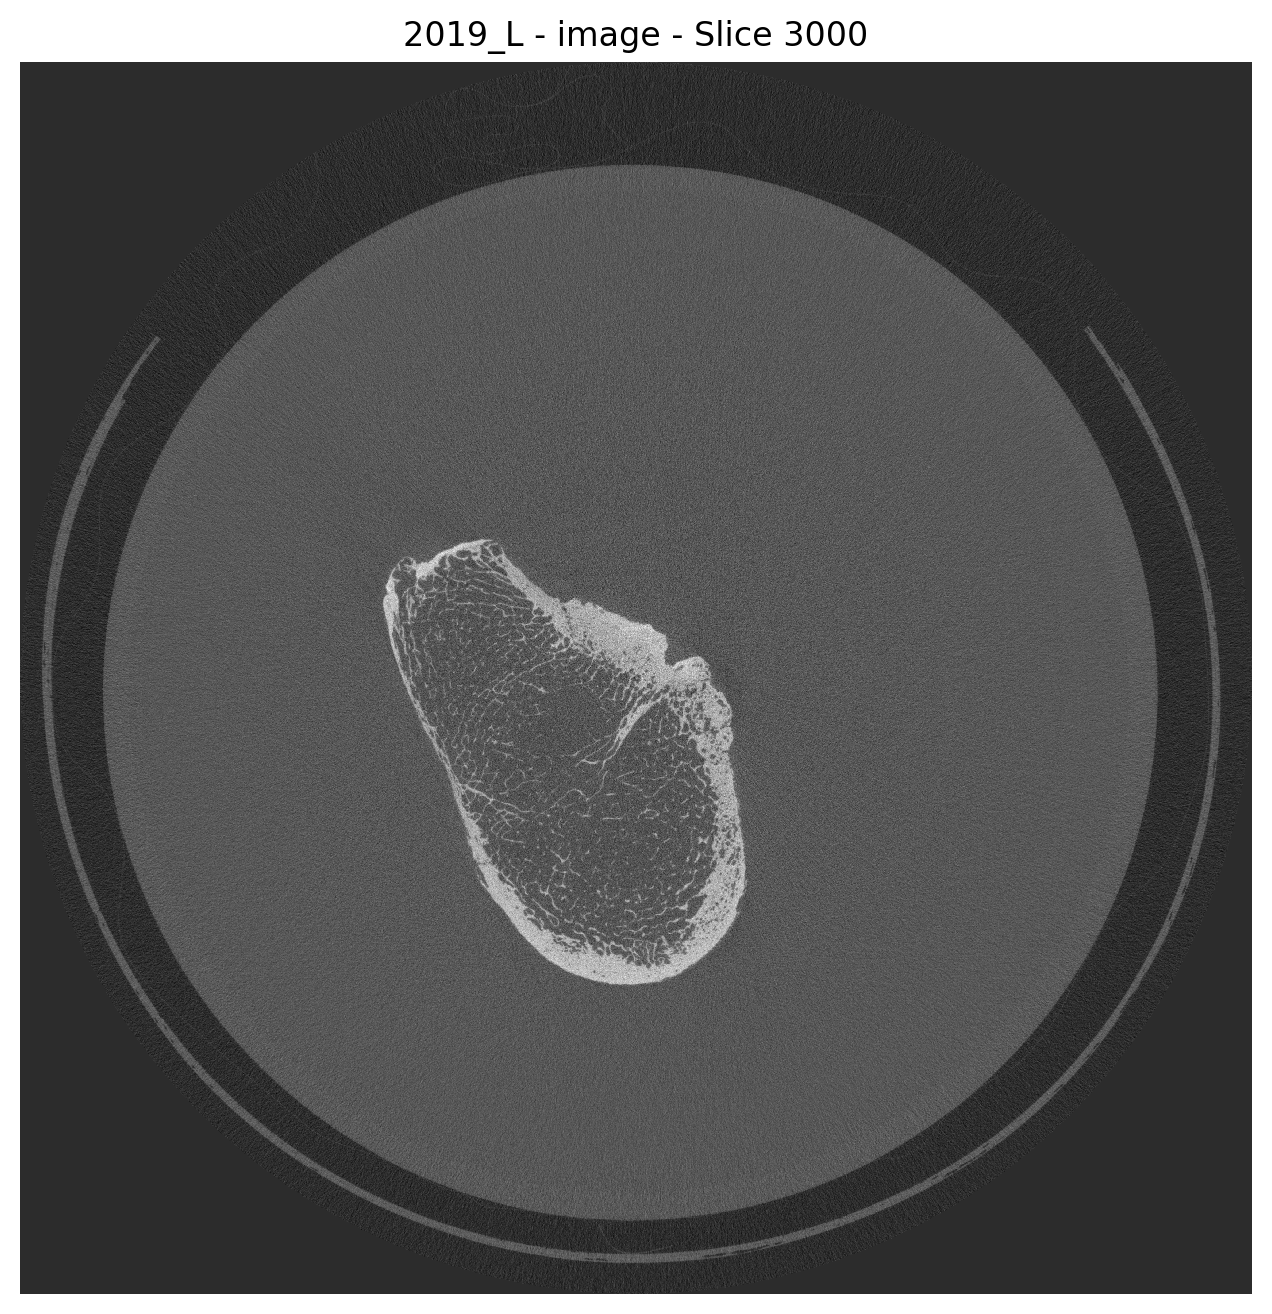

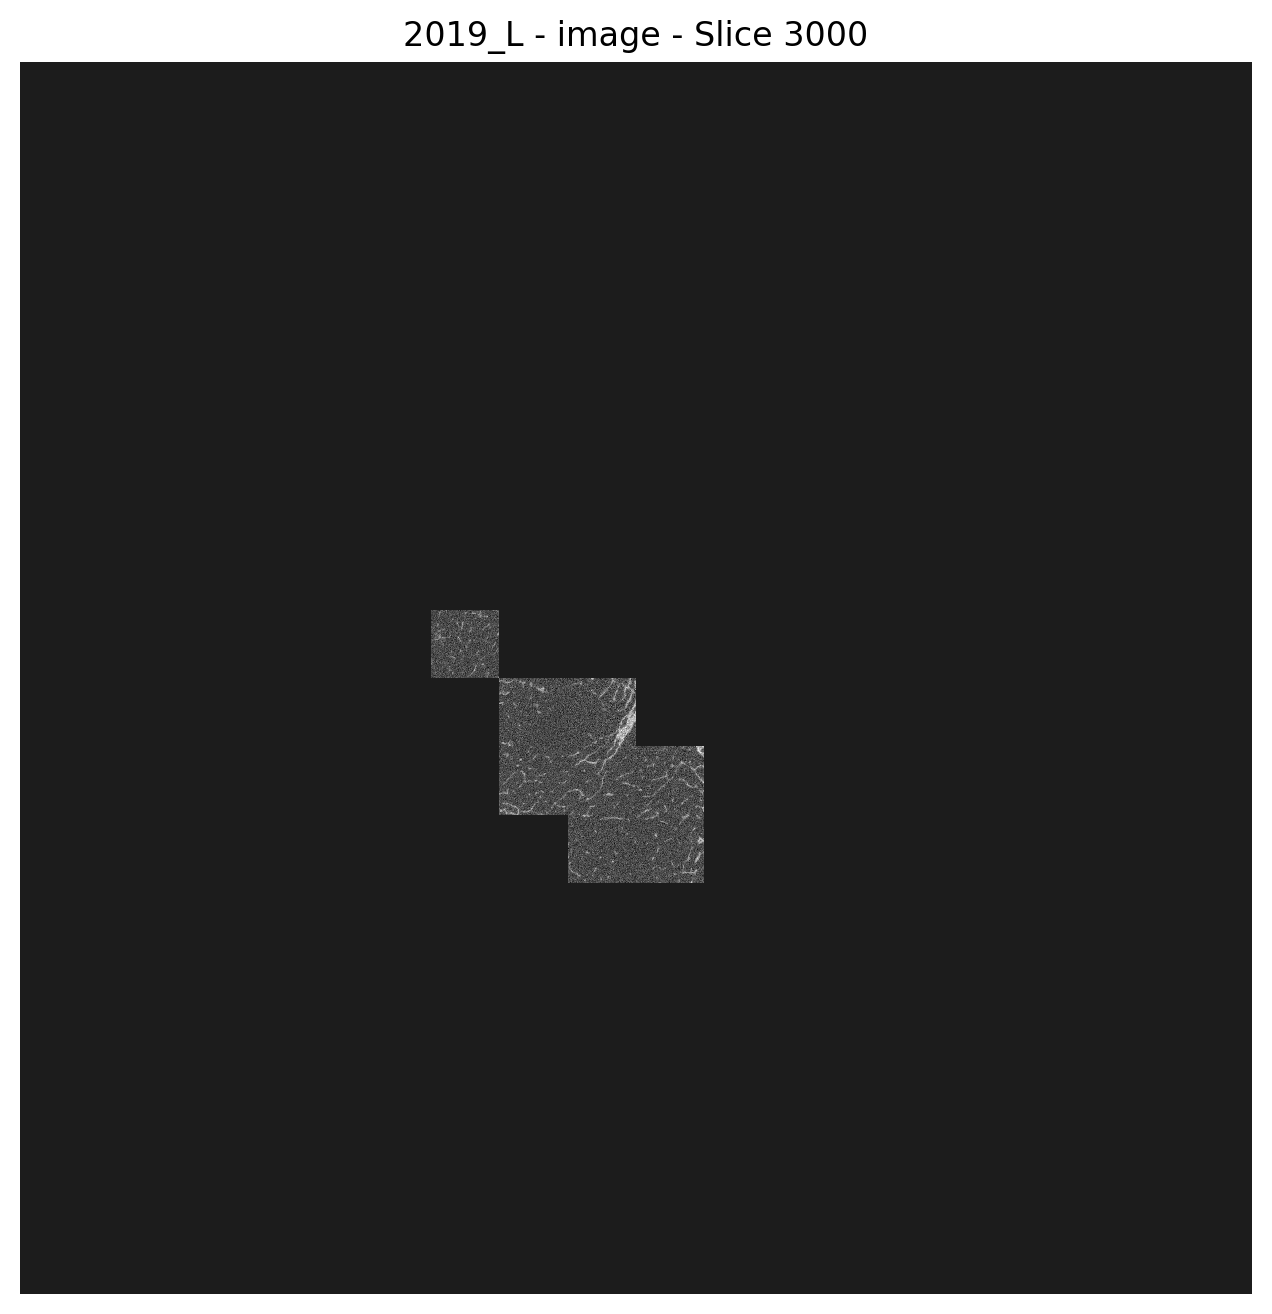

In [6]:
# Choose which slice to display
slice_index = 3000


# Load and show the slice
slice_img = src[slice_index].compute()

plt.figure(figsize=(8, 8), dpi=200)  
plt.imshow(slice_img, cmap='gray', interpolation='none')  # Disable blurring
plt.title(f"{group_name} - {dataset_name} - Slice {slice_index}")
plt.axis("off")
plt.show()


slice_img_sr = src_sr[slice_index].compute()

plt.figure(figsize=(8, 8), dpi=200)  
plt.imshow(slice_img_sr, cmap='gray', interpolation='none')  # Disable blurring
plt.title(f"{group_name} - {dataset_name} - Slice {slice_index}")
plt.axis("off")
plt.show()

# slice_img_mask = src_mask[slice_index].compute()

# plt.figure(figsize=(10, 10))  
# plt.imshow(slice_img_mask, cmap='gray', vmin=0, vmax=1, interpolation='none')
# plt.title(f"{group_name} - {dataset_name} - Slice {slice_index}")
# plt.axis("off")
# plt.show()